In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys, os
import csv
import datetime
import numpy as np
import netCDF4
import ast
import scipy.stats
#import json

import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

from scipy import stats

import selection_criteria as s_c

In [4]:
def ts_to_dt(ts):
    return datetime.datetime.utcfromtimestamp(ts)
def dt_to_ts(dt):
    return (dt - datetime.datetime(1970, 1, 1)).total_seconds()
def lin2z(array):
    """linear values to dB (for np.array or single number)"""
    return 10 * np.log10(array)

def z2lin(array):
    """dB to linear values (for np.array or single number)"""
    return 10 ** (array / 10.)

In [5]:
filename = {
    "Pun_larda3": '../cloud_collections/cloud_collection_lacros_dacapo_all.csv',
    "Lim_larda3": '../cloud_collections/cloud_collection_lacros_cycare_all.csv',
    "Lei_larda3": '../cloud_collections/cloud_collection_lacros_leipzig_all.csv',
}

larda_names = {
    "Pun_larda3": "lacros_dacapo",
    "Lim_larda3": "lacros_cycare",
    "Lei_larda3": "lacros_cycare",
}

camp = "Pun_larda3"
camp = "Lim_larda3"
camp = "Lei_larda3"

larda_name = larda_names[camp]
withCTH = True
withCTH = False

season = 'all'
# season = 'warm'
# season = 'cold'

In [6]:
data = []
with open(filename[camp], 'r') as f:
#with open('cloud_collection_LEIPZIG_all.csv', 'r') as f:
    reader = csv.reader(f, delimiter=';')
    header = next(reader)
    print("\n".join(sorted(header)))
    for row in reader:
        #data.append(row)
        comp = row[1].replace('_', '')
        if row[0][:14] == comp:
            data.append({k:v for k, v in zip(header, row)})
        else:
            print('corrupted row ', row)
            break
        
#[print(cloud['CBH']) for cloud in data]
data_filtered = []
for i, cloud in enumerate(data[:]):
    dt_begin = ts_to_dt(float(cloud['Begin_Date_Unix']))
    dt_end = ts_to_dt(float(cloud['End_Date_Unix']))
    duration = dt_end-dt_begin
    h_base = float(cloud['CBH'])
    n_prof = float(cloud['N_Profiles'])
    iwc_n = float(cloud['IWC_TOP_N'])

    if withCTH:
        conds = s_c.conditions_ice_w_CTH(cloud)
    else:
        conds = s_c.conditions_ice_wo_CTH(cloud)
    
    #print(dt_begin, '-', dt_end, ':', h_base, h_top, conds)
#     if cloud["Cloud_Run"] == 'mixed-phase':
#         print(conds)
#         print(cloud['A_Unique_Identifier'] + " critera not matched: " + "   ".join([t for c, t in zip(conds, conds_text) if not c]))
#         print("duration", duration, 'htop', float(cloud['CTH']), 'sigma_thick', sigma_thick)
#         print(cloud["Cloud_Run"], 'prof', n_prof, duration.seconds/30,'sigma_cth', sigma_cth, 'iwc_n', iwc_n)
    # JB in mail 25.01.2018
    # if end-begin>1800 and n_profiles/((end-begin)/30.0)>0.8 and cth>2000 and delta_h<300.0 and std_h<150 and ctt>0:

    # hier wird aus der csv datei folgende Eigenschaften geladen:
    # begin: BEGIN_DATE_UNIX
    # end: END_DATE_UNIX
    # n_profiles: N_PROFILES
    # cth: CTH_AVG
    # delta_h: CLOUD_THICKNESS_STD
    # ctt: CTT_MED

    if all(conds[::2]):
        data_filtered.append(cloud)

    
print('len raw data ', len(data))
only_dates = sorted([d["Begin_Date"] for d in data])
print(only_dates[0], only_dates[-1])
print('len filtered ', len(data_filtered))

# print('copy paste for case study file')
# for i, cloud in enumerate(data_filtered[:]):

#     dt_begin = ts_to_dt(float(cloud['Begin_Date_Unix'])) - datetime.timedelta(minutes=10)
#     dt_end = ts_to_dt(float(cloud['End_Date_Unix'])) + datetime.timedelta(minutes=10)
#     cbh = float(cloud['CBH']) - 300
#     cth = float(cloud['CTH']) + 300
#     ctt = float(cloud['CTT']) - 273.15
#     iwc_top_med = float(cloud['IWC_TOP_MED'])
    
#     print("[case.{}]".format(dt_begin.strftime("%Y%m%d-%H%M")))
#     print("""    comment = "CTT {:.2f}; IWC_top_med {:.4e};" """.format(ctt, iwc_top_med))
#     print("""    sniffer_id = "{}" """.format(cloud['A_Unique_Identifier']))
#     print("""    time_interval = ["{}", "{}"]""".format(dt_begin.strftime("%Y%m%d-%H%M"), dt_end.strftime("%Y%m%d-%H%M")))
#     print("""    range_interval = [{:.0f}, {:.0f}]""".format(cbh, cth))
#     print("""    plot_dir = "plots/dacapo_auto/{}/" """.format(dt_begin.strftime("%Y%m%d-%H%M")))

#
#  make the plots
#





A_Unique_Identifier
Begin_Date
Begin_Date_Unix
CBH
CBP
CBT
CTH
CTH_AVG
CTH_DIFFSUM
CTH_STD
CTH_autocorr_08_time
CTP
CTT
CTT_MED
Cloud_Run
Cloud_Thickness_AVG
Cloud_Thickness_MED
Cloud_Thickness_STD
Cloud_Type
DIR
Date_Day
Date_Hour
Date_Month
Date_Year
End_Date
End_Date_Unix
ILCR_AVG
ILCR_MED
ILCR_N
ILCR_values
IWC_AVG
IWC_MED
IWC_N
IWC_STD
IWC_TOP_AVG
IWC_TOP_MED
IWC_TOP_N
IWC_TOP_STD
LDR_AVG
LDR_MED
LDR_N
LDR_STD
LDR_TOP_AVG
LDR_TOP_MED
LDR_TOP_N
LDR_TOP_STD
LDR_values
LDRcorr_AVG
LDRcorr_MED
LDRcorr_N
LDRcorr_STD
LDRcorr_TOP_AVG
LDRcorr_TOP_MED
LDRcorr_TOP_N
LDRcorr_TOP_STD
LLH_STD
LWC_AVG
LWC_MED
LWC_N
LWC_STD
N_Drizzle
N_Liquid
N_Melting
N_MixedPhase
N_Profiles
PATH_IWP_AVG
PATH_IWP_STD
PATH_LWP_AVG
PATH_LWP_S_AVG
SNR_TOP_AVG
SNR_TOP_MED
SNR_TOP_N
SNR_TOP_STD
VEL
ZE_AVG
ZE_MED
ZE_N
ZE_STD
ZE_TOP_AVG
ZE_TOP_MED
ZE_TOP_N
ZE_TOP_STD
Z_AVG
Z_AVG_drop
Z_MED
Z_MED_drop
Z_N
Z_N_drop
Z_STD
Z_STD_drop
Z_TOP_AVG
Z_TOP_MED
Z_TOP_N
Z_TOP_STD
Z_TOP_values
Z_top
Z_values
alpha_Hogan_AVG
alpha_

In [7]:
#used to save the histogram
#np.histogram(clouds[i].return_values("Z",ice_only),90,(-70.0,20))[0]

In [8]:


reconstructed_z = np.array([])
reconstructed_ctt = np.array([])
print(len(data_filtered))
for c in data_filtered[:]:
    #print(c['CTT'])
    z_values = ast.literal_eval(c['Z_values'])
    #print(z_values)
    _, edges = np.histogram([0],90,(-70.0,20))
    #print(edges)
    centers = edges[:-1]+(edges[1:]-edges[:-1])/2.

    for v in zip(z_values, centers):
        #print(v)
        reconstructed_z = np.append(reconstructed_z, np.full(v[0], v[1]))
    reconstructed_ctt = np.append(reconstructed_ctt, np.full(sum(z_values), float(c['CTT'])))

    #print(reconstructed_z.shape, reconstructed_z)    
    #print(reconstructed_ctt.shape, reconstructed_ctt)
    
print(min(reconstructed_ctt)-273.15)

# calibration adjustment
reconstructed_z += 6

499
-37.86408668194085


In [9]:

cmap = matplotlib.cm.get_cmap('viridis')
cmap(0)

(0.267004, 0.004874, 0.329415, 1.0)

[-52 -48 -44 -40 -36 -32 -28 -24 -20 -16 -12  -8  -4   0   4]
(15,)
(60,)
(14, 59)


<ipython-input-10-757ed6bbf54a>:35: RuntimeWarning: invalid value encountered in true_divide
  hist2d[n,:]/=np.sum(hist2d[n,:])
<ipython-input-10-757ed6bbf54a>:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(xedge[:-1], ycenters, np.transpose(hist2d), vmax=0.07)


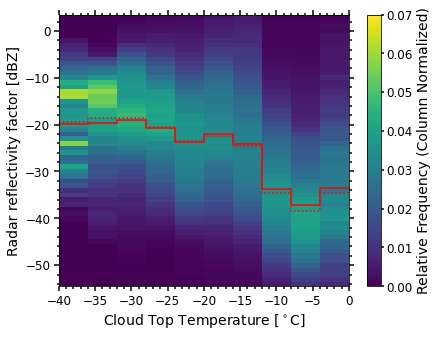

In [10]:

set_x_edges = np.arange(-0,60,4)[::-1]*-1
set_x_edges = np.arange(-52,5,4)
print(set_x_edges)

def plot_2D_histogram(x, y, x_label, y_label, norm="", display_y=(np.NAN,np.NAN), mean_x=False):
    """Plot a colorerd 2d histogram of gridded input data
    
    savename: Name of the output file (image format like png, svg, ...)
    x, y: arrays holding axes
    Nx, Ny: Number of bins for x and y axis
    rangex, rangey: value range for x and y axis
    x_label, y_label: Names for x and y axes
    norm: Kind of normalization (can be  'column'  or  'row')
    display_y: Tuple with plotting ranges for x and y
    Example: 
    plot_2D_histogram('ldr_histogram.png',CTT,LDR,Nx=15,Ny=60,rangex=(-40,0),rangey=(-35,-5),
                        x_label="Cloud Top Temperature [degC]", y_label="Linear Depol. Ratio [dB]", norm="column")
    
    """
    
    fig, ax = plt.subplots(1, figsize=(6.5, 5))
    ax.set_facecolor((0.267004, 0.004874, 0.329415, 1.0))
    hist2d, xedge, yedge = np.histogram2d(x,y, (set_x_edges, np.arange(-55,5,1)))
    print(xedge.shape)
    print(yedge.shape)
    xcenters = xedge[:-1]+(xedge[1:]-xedge[:-1])/2.
    ycenters = yedge[:-1]+(yedge[1:]-yedge[:-1])/2.

    
#     for i in range(len(hist2d)):
#         hist2d[i,np.argmax(hist2d[i,:])]=0
        
    if norm=='column':
        for n in range(np.shape(hist2d)[0]):
            hist2d[n,:]/=np.sum(hist2d[n,:])
    elif norm=='row':
        for n in range(np.shape(hist2d)[1]):
            hist2d[:,n]/=np.sum(hist2d[:,n])
            
    print(hist2d.shape)
    #hist2d=np.rot90(np.log10(hist2d),1)

    mean_along_x, _, _ = scipy.stats.binned_statistic(
        x, y, statistic='mean', bins=set_x_edges)
    median_along_x, _, _ = scipy.stats.binned_statistic(
        x, y, statistic='median', bins=set_x_edges)
    
#     for n in range(np.shape(hist2d)[0]):
#         fig2, ax2 = plt.subplots()
#         ax2.plot(ycenters, hist2d[n,:])
#         ax2.plot(mean_along_x[n], 0, '.')
        
#         ax2.set_title(xcenters[n])

    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    ax.set_xlim([-40,0])
    #ax.set_ylim([-50,0])
    #ax.set_ylim(display_y[0],display_y[1])

    
    pc = ax.pcolormesh(xedge[:-1], ycenters, np.transpose(hist2d), vmax=0.07)
    #img=plt.imshow(hist2d,extent=(rangex[0],rangex[1],rangey[1],rangey[0]),aspect='auto', 
    #               origin='lowerleft', interpolation='nearest', cmap="Spectral")
    cbar = fig.colorbar(pc)
    
    if mean_x:
        ax.step(xcenters, mean_along_x, where='mid', color='red')
        ax.step(xcenters, median_along_x, linestyle=':', where='mid', color='red')
    
    cbar.set_label("Relative Frequency (Column Normalized)", fontsize=14)
    
    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.tick_params(axis='both', which='major', direction='out',
                   top=True, right=True,
                   width=1.5, length=5, labelsize=12)
    ax.tick_params(axis='both', which='minor', direction='out', 
                   top=True, right=True,
                   width=1.5, length=2.5)
    cbar.ax.tick_params(axis='y', which='major', direction='out',
                     right=True,
                     width=1.5, length=2.5, labelsize=12)

    #plt.savefig(savename, bbox_inches='tight')
    return fig, ax


fig, ax = plot_2D_histogram(reconstructed_ctt-273.15,reconstructed_z,
                            x_label="Cloud Top Temperature [$^\circ$C]", y_label="Radar reflectivity factor [dBZ]", 
                            norm="column", mean_x=True)

fname = '../plots/ice_hists/{}_Z_hist.png'.format(camp)
plt.savefig(fname, dpi=250)

In [11]:
def load_data(filename):
    data = []
    with open(filename, 'r') as f:
    #with open('cloud_collection_LEIPZIG_all.csv', 'r') as f:
        reader = csv.reader(f, delimiter=';')
        header = next(reader)
        for row in reader:
            #data.append(row)
            comp = row[1].replace('_', '')
            if row[0][:14] == comp:
                data.append({k:v for k, v in zip(header, row)})
            else:
                print('corrupted row ', row)
                break
    return data


def make_stat(data, avg='dB', values='Z_values', silent=False, season='all'):
    
    data_filtered = []
    for i, cloud in enumerate(data[:]):
        dt_begin = ts_to_dt(float(cloud['Begin_Date_Unix']))
        dt_end = ts_to_dt(float(cloud['End_Date_Unix']))
        duration = dt_end-dt_begin
        h_base = float(cloud['CBH'])
        n_prof = float(cloud['N_Profiles'])
        iwc_n = float(cloud['IWC_TOP_N'])

        if withCTH:
            conds = s_c.conditions_ice_w_CTH(cloud)
        else:
            conds = s_c.conditions_ice_wo_CTH(cloud)
            
        if season == 'warm':
            conds += [dt_begin.month in [10,11,12,1,2,3], f"{dt_begin.month}, warm"]
        elif season == 'cold':
            conds += [dt_begin.month in [4,5,6,7,8,9], f"{dt_begin.month}, cold"]

        if all(conds[::2]):
            data_filtered.append(cloud)
            
    reconstructed_z = np.array([])
    reconstructed_ctt = np.array([])
    print(len(data_filtered))
    for c in data_filtered[:]:
        #print(c['CTT'])
        z_values = ast.literal_eval(c[values])
        #print(z_values)
        _, edges = np.histogram([0],90,(-70.0,20))
        #print(edges)
        centers = edges[:-1]+(edges[1:]-edges[:-1])/2.

        for v in zip(z_values, centers):
            #print(v)
            reconstructed_z = np.append(reconstructed_z, np.full(v[0], v[1]))
        reconstructed_ctt = np.append(reconstructed_ctt, np.full(sum(z_values), float(c['CTT'])))

        #print(reconstructed_z.shape, reconstructed_z)    
        #print(reconstructed_ctt.shape, reconstructed_ctt)

    # calibration adjustment
    reconstructed_z += 6
    reconstructed_ctt -= 273.15
    
    x = reconstructed_ctt
    y = reconstructed_z
    if avg == 'lin':
        y = 10**(y/10.)
        
    counts, _, _ = scipy.stats.binned_statistic(
        x, y, statistic='count', bins=set_x_edges)
    std, _, _ = scipy.stats.binned_statistic(
        x, y, statistic='std', bins=set_x_edges)
    mean_along_x, xedge, _ = scipy.stats.binned_statistic(
        x, y, statistic='mean', bins=set_x_edges)
    median_along_x, _, no_per_bin = scipy.stats.binned_statistic(
        x, y, statistic='median', bins=set_x_edges)
    P2_5, _, no_per_bin = scipy.stats.binned_statistic(
        x, y, statistic=lambda y: np.percentile(y, 2.5), bins=set_x_edges)
    Q1, _, no_per_bin = scipy.stats.binned_statistic(
        x, y, statistic=lambda y: np.percentile(y, 25), bins=set_x_edges)
    Q3, _, no_per_bin = scipy.stats.binned_statistic(
        x, y, statistic=lambda y: np.percentile(y, 75), bins=set_x_edges)
    P97_5, _, no_per_bin = scipy.stats.binned_statistic(
        x, y, statistic=lambda y: np.percentile(y, 97.5), bins=set_x_edges)
    
    xcenters = xedge[:-1]+(xedge[1:]-xedge[:-1])/2.
    
    if avg == 'lin':
        mean_along_x = 10*np.log10(mean_along_x)
        median_along_x = 10*np.log10(median_along_x)
        std = 10*np.log10(std)
        P2_5 = 10*np.log10(P2_5)
        Q1 = 10*np.log10(Q1)
        Q3 = 10*np.log10(Q3)
        P97_5 = 10*np.log10(P97_5)
    
    return {
        'xcenters': xcenters,
        'counts': counts,
        'std': std,
        'mean_along_x': mean_along_x,
        'median_along_x': median_along_x,
        'P2_5': P2_5,
        'Q1': Q1,
        'Q3': Q3,
        'P97_5': P97_5,
    }


avg = 'lin'
avg = 'dB'
values='Z_TOP_values'
# values='Z_values'
print(' === Clouds Limassol =============                ')
stat_limassol = make_stat(load_data(filename['Lim_larda3']), avg, values=values, silent=True)
print(' === Clouds Punta    =============                ')
stat_punta = make_stat(load_data(filename['Pun_larda3']), avg, values=values, silent=True, season=season)
print(' === Clouds Leipzig  =============                ')
stat_le = make_stat(load_data(filename['Lei_larda3']), avg, values=values, silent=True)

 === Clouds Limassol =============                
197
 === Clouds Punta    =============                
508
 === Clouds Leipzig  =============                
499


[-50. -46. -42. -38. -34. -30. -26. -22. -18. -14. -10.  -6.  -2.   2.]
[ 0.          0.          0.          7.07106781  6.57224724  7.5134504
  8.40325056  8.74413689  9.59201467 12.07134407 10.4321021   9.38757117
 11.64959341  0.        ]
Lei sampling error [       nan        nan        nan 1.27000127 0.44011023 0.22726332
 0.20303394 0.15722695 0.15634537 0.15562008 0.09594994 0.0898507
 0.38159512        nan]
Lim sampling error [       nan        nan        nan 0.49132827 0.25123632 0.20029619
 0.1994058  0.25639833 0.35142017 0.23475811 0.3028298  0.3120924
 0.57235652        nan]
Pun sampling error [       nan        nan        nan 0.49382585 0.24984969 0.16467134
 0.20080174 0.19202166 0.18010443 0.19044995 0.20859476 0.19450499
 0.29350768 1.578143  ]


<ipython-input-12-5071a44286cc>:18: RuntimeWarning: invalid value encountered in true_divide
  sampling_error = stat_le['std']/np.sqrt(stat_le['counts'])
<ipython-input-12-5071a44286cc>:32: RuntimeWarning: invalid value encountered in true_divide
  sampling_error = stat_limassol['std']/np.sqrt(stat_limassol['counts'])
<ipython-input-12-5071a44286cc>:41: RuntimeWarning: invalid value encountered in true_divide
  sampling_error = stat_punta['std']/np.sqrt(stat_punta['counts'])


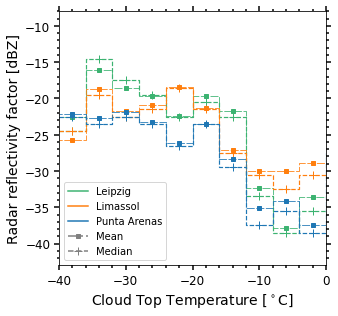

In [12]:
fig, ax = plt.subplots(figsize=(4.8, 4.5))

# ax.step(stat_punta['xcenters'], stat_punta['mean_along_x'],
#         lw=0.8, ls=(6, (10, 2)), marker='s', markersize=3.3,
#         where='mid', color='C0')
# ax.step(stat_punta['xcenters'], stat_punta['median_along_x'],
#         marker='+', ms=8,
#         lw=1.2, where='mid', linestyle='--', color='C0')

print(stat_le['xcenters'])
ax.step(stat_le['xcenters'], stat_le['mean_along_x'],
        lw=0.8, ls=(6, (10, 2)), marker='s', markersize=3.3,
        where='mid', color='mediumseagreen')
ax.step(stat_le['xcenters'], stat_le['median_along_x'],
        marker='+', ms=8,
        lw=1.2, where='mid', linestyle='--', color='mediumseagreen')
print(stat_le['std'])
sampling_error = stat_le['std']/np.sqrt(stat_le['counts'])
print('Lei sampling error', sampling_error)


# ax.errorbar(stat_le['xcenters']-0.5, stat_le['mean_along_x'], yerr=stat_le['std'], 
#             color='mediumseagreen', capsize=4, 
#             linewidth=0, elinewidth=1.5)

ax.step(stat_limassol['xcenters'], stat_limassol['mean_along_x'],
        lw=0.8, ls=(6, (10, 2)), marker='s', markersize=3.3,
        where='mid', color='C1')
ax.step(stat_limassol['xcenters'], stat_limassol['median_along_x'],
        marker='+', ms=8,
        lw=1.2, where='mid', linestyle='--', color='C1')
sampling_error = stat_limassol['std']/np.sqrt(stat_limassol['counts'])
print('Lim sampling error', sampling_error)

ax.step(stat_punta['xcenters'], stat_punta['mean_along_x'], 
        lw=0.8, ls=(6, (10, 2)), marker='s', markersize=3.3,
        where='mid', color='C0')
ax.step(stat_punta['xcenters'], stat_punta['median_along_x'],
        marker='+', ms=8,
        lw=1.2, where='mid', linestyle='--', color='C0')
sampling_error = stat_punta['std']/np.sqrt(stat_punta['counts'])
print('Pun sampling error', sampling_error)


ax.set_ylim([-43,-8])
ax.set_xlim([-40, 0])

handles, labels = ax.get_legend_handles_labels()
patch = matplotlib.lines.Line2D([0], [0], color='mediumseagreen', label='Leipzig')
handles.append(patch) 
patch = matplotlib.lines.Line2D([0], [0], color='C1', label='Limassol')
handles.append(patch) 
patch = matplotlib.lines.Line2D([0], [0], color='C0', label='Punta Arenas')
handles.append(patch) 
patch = matplotlib.lines.Line2D([0], [0], color='grey', marker='s', ms=3.3, ls=(0, (10, 2)), label='Mean')
handles.append(patch) 
patch = matplotlib.lines.Line2D([0], [0], color='grey', marker='+', ms=8, ls='--', label='Median')
handles.append(patch) 

ax.legend(handles=handles, loc='lower left')

ax.set_xlabel("Cloud Top Temperature [$^\circ$C]", fontsize=14)
ax.set_ylabel("Radar reflectivity factor [dBZ]", fontsize=14)

ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.tick_params(axis='both', which='major', direction='out',
               top=True, right=True,
               width=1.5, length=5, labelsize=12)
ax.tick_params(axis='both', which='minor', direction='out', 
               top=True, right=True,
               width=1.5, length=2.5)

fig.tight_layout()
if season != 'all':
    fname = '../plots/ice_hists/Lim_Punta_Z_full_virga_{}_{}_{}'.format(avg, values, season)
else:
    fname = '../plots/ice_hists/Lim_Punta_Z_full_virga_{}_{}'.format(avg, values)
plt.savefig(fname+".png", dpi=250)
# plt.savefig(fname+".svg", dpi=250)

In [13]:
print('T  lim-punt, le-punt')

for e in zip(
    stat_le['xcenters'],
    stat_limassol['mean_along_x']-stat_punta['mean_along_x'],
    stat_le['mean_along_x']-stat_punta['mean_along_x']):
    
    print(f"{e[0]:>5.1f}   {e[1]:6.2f}   {e[2]:6.2f}")

T  lim-punt, le-punt
-50.0      nan      nan
-46.0      nan      nan
-42.0      nan      nan
-38.0    -3.66    -0.38
-34.0     3.90     6.54
-30.0     0.16     3.39
-26.0     2.32     3.49
-22.0     7.75     3.83
-18.0     2.22     3.93
-14.0     1.24     6.58
-10.0     5.08     2.77
 -6.0     4.19    -3.76
 -2.0     8.63     3.84
  2.0      nan      nan


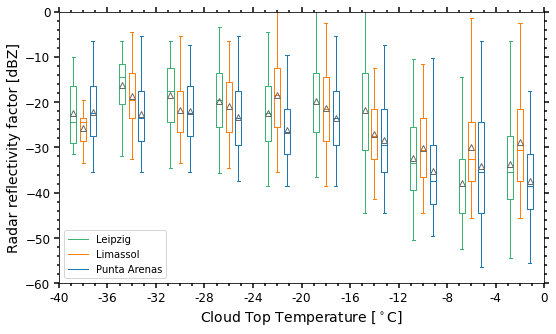

In [14]:
def to_bxp_stats(stat):
    """reformat to the boxplot stat format"""
    l = []
    
    for i in range(stat['counts'].shape[0]):
        l.append({'mean': stat['mean_along_x'][i], 'med': stat['median_along_x'][i],
                  'q1': stat['Q1'][i], 'q3': stat['Q3'][i],
                  'whislo': stat['P2_5'][i], 'whishi': stat['P97_5'][i]})
    return l

fig, ax = plt.subplots(figsize=(8.7, 5))

# Leipzig
stat_le_box = to_bxp_stats(stat_le)
bx = ax.bxp(stat_le_box, showfliers=False, positions=stat_punta['xcenters']-0.8, showmeans=True)
# adapt the colors
for element in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bx[element], color='mediumseagreen')
plt.setp(bx['means'], markeredgecolor= 'dimgrey', markerfacecolor='none')


# Limassol
stat_lim_box = to_bxp_stats(stat_limassol)
bx = ax.bxp(stat_lim_box, showfliers=False, positions=stat_punta['xcenters'], showmeans=True)
# adapt the colors
for element in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bx[element], color='C1')
plt.setp(bx['means'], markeredgecolor= 'dimgrey', markerfacecolor='none')

# Punta Arenas
stat_pun_box = to_bxp_stats(stat_punta)
bx = ax.bxp(stat_pun_box, showfliers=False, positions=stat_punta['xcenters']+0.8, showmeans=True)
# adapt the colors
for element in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bx[element], color='C0')
plt.setp(bx['means'], markeredgecolor= 'dimgrey', markerfacecolor='none')

ax.set_xticks(np.arange(-52,5,4))
ax.set_xticklabels(np.arange(-52,5,4))

ax.set_ylim([-60,0])
ax.set_xlim([-40, 0])

ax.set_xlabel("Cloud Top Temperature [$^\circ$C]", fontsize=14)
ax.set_ylabel("Radar reflectivity factor [dBZ]", fontsize=14)

ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.tick_params(axis='both', which='major', direction='out',
               top=True, right=True,
               width=1.5, length=5, labelsize=12)
ax.tick_params(axis='both', which='minor', direction='out', 
               top=True, right=True,
               width=1.5, length=2.5)


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='mediumseagreen', lw=1),
                Line2D([0], [0], color='C1', lw=1),
                Line2D([0], [0], color='C0', lw=1)]

ax.legend(custom_lines, ['Leipzig', 'Limassol', 'Punta Arenas'])

if season != 'all':
    fname = '../plots/ice_hists/Lim_Punta_Z_boxplot_full_virga_{}_{}_{}'.format(avg, values, season)
else:
    fname = '../plots/ice_hists/Lim_Punta_Z_boxplot_full_virga_{}_{}'.format(avg, values)
plt.savefig(fname+".png", dpi=250)

## elaborate on the pressure effect on growth

197
508
499
-15 0.19160756920105732 0.38321513840211463 2.0
-30 0.17059913377053493 0.34119826754106986 2.0
-20 0.18264700033479034 0.21450403527690495 1.1744186046511629 0.8514851485148514


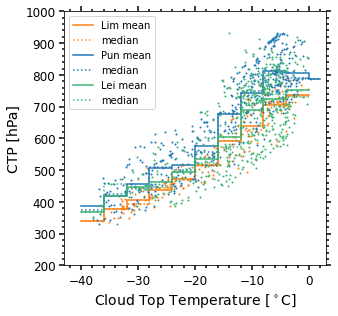

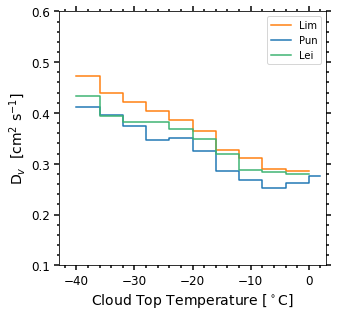

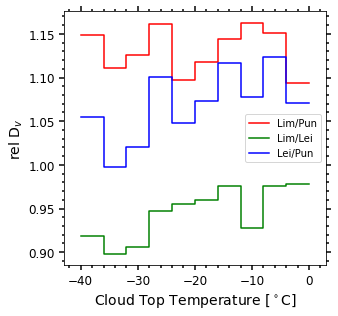

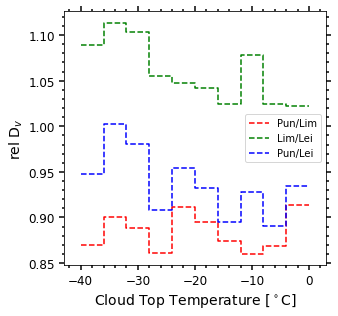

In [15]:
def plot_binned_mean(data, param, ylims=[None, None], yscale='lin', mask=np.nan):
    
    data_filtered = []
    for i, cloud in enumerate(data[:]):
        dt_begin = ts_to_dt(float(cloud['Begin_Date_Unix']))
        dt_end = ts_to_dt(float(cloud['End_Date_Unix']))
        duration = dt_end-dt_begin
        h_base = float(cloud['CBH'])
        n_prof = float(cloud['N_Profiles'])
        iwc_n = float(cloud['IWC_TOP_N'])

        if withCTH:
            conds = s_c.conditions_ice_w_CTH(cloud)
        else:
            conds = s_c.conditions_ice_wo_CTH(cloud)

        if all(conds[::2]):
            data_filtered.append(cloud)
    
    data = data_filtered
    set_x_edges = np.arange(-52,5,4)
    
    ctt = np.array([float(d['CTT']) for d in data])
    ctt[ctt == 0.0] = np.nan
    var = np.array([float(d[param]) for d in data])
    var[np.isclose(var, 0.0)] = mask
    masking = np.isclose(var, 0.0)
    

    x = ctt[~masking] - 273.15
    y = var[~masking]
    
    print(y.shape[0])
    if not y.shape[0]:
        return plt.subplots(figsize=(4.8, 4.5))
        
    counts, _, _ = scipy.stats.binned_statistic(
        x, y, statistic='count', bins=set_x_edges)
    std, _, _ = scipy.stats.binned_statistic(
        x, y, statistic='std', bins=set_x_edges)
    mean_along_x, xedge, _ = scipy.stats.binned_statistic(
        x, y, statistic='mean', bins=set_x_edges)
    median_along_x, _, no_per_bin = scipy.stats.binned_statistic(
        x, y, statistic='median', bins=set_x_edges)
    P2_5, _, no_per_bin = scipy.stats.binned_statistic(
        x, y, statistic=lambda y: np.percentile(y, 2.5), bins=set_x_edges)
    Q1, _, no_per_bin = scipy.stats.binned_statistic(
        x, y, statistic=lambda y: np.percentile(y, 25), bins=set_x_edges)
    Q3, _, no_per_bin = scipy.stats.binned_statistic(
        x, y, statistic=lambda y: np.percentile(y, 75), bins=set_x_edges)
    P97_5, _, no_per_bin = scipy.stats.binned_statistic(
        x, y, statistic=lambda y: np.percentile(y, 97.5), bins=set_x_edges)
    
    xcenters = xedge[:-1]+(xedge[1:]-xedge[:-1])/2.
    
    return xcenters, mean_along_x, median_along_x, x, y

    
    
CTP_Lim = plot_binned_mean(load_data(filename['Lim_larda3']), 'CTP', ylims=[200e2, 1000e2], yscale='lin', mask=1e-50)
CTP_Pun = plot_binned_mean(load_data(filename['Pun_larda3']), 'CTP', ylims=[200e2, 1000e2], yscale='lin', mask=1e-50)
CTP_Lei = plot_binned_mean(load_data(filename['Lei_larda3']), 'CTP', ylims=[200e2, 1000e2], yscale='lin', mask=1e-50)
    

fig, ax = plt.subplots(figsize=(4.8, 4.5))

ax.plot(CTP_Lim[3], CTP_Lim[4]/1e2, '.', color='C1', markersize=2)
ax.step(CTP_Lim[0], CTP_Lim[1]/1e2,
        where='mid', color='C1', label='Lim mean')
ax.step(CTP_Lim[0], CTP_Lim[2]/1e2, 
        where='mid', linestyle=':', color='C1', label='median')

ax.plot(CTP_Pun[3], CTP_Pun[4]/1e2, '.', color='C0', markersize=2)
ax.step(CTP_Pun[0], CTP_Pun[1]/1e2,
        where='mid', color='C0', label='Pun mean')
ax.step(CTP_Pun[0], CTP_Pun[2]/1e2, 
        where='mid', linestyle=':', color='C0', label='median')

ax.plot(CTP_Lei[3], CTP_Lei[4]/1e2, '.', color='mediumseagreen', markersize=2)
ax.step(CTP_Lei[0], CTP_Lei[1]/1e2,
        where='mid', color='mediumseagreen', label='Lei mean')
ax.step(CTP_Lei[0], CTP_Lei[2]/1e2, 
        where='mid', linestyle=':', color='mediumseagreen', label='median')


ax.set_ylim([200, 1000])
#ax.set_xlim([-40, 0])
ax.set_xlim([-43, 3])
ax.legend()

ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.set_xlabel("Cloud Top Temperature [$^\circ$C]", fontsize=14)
ax.set_ylabel("CTP [hPa]", fontsize=14)

ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.tick_params(axis='both', which='major', direction='out',
               top=True, right=True,
               width=1.5, length=5, labelsize=12)
ax.tick_params(axis='both', which='minor', direction='out', 
               top=True, right=True,
               width=1.5, length=2.5)
plt.tight_layout()


def wv_diff(T, p):
    """T in K, p in hPa"""
    T0 = 273.15
    p0 = 1013.25
    return 0.211*(T/T0)**1.94*(p0/p)

print('-15', wv_diff(273.15-15, 1000), wv_diff(273.15-15, 500), wv_diff(273.15-15, 500)/wv_diff(273.15-15, 1000))
print('-30', wv_diff(273.15-30, 1000), wv_diff(273.15-30, 500), wv_diff(273.15-30, 500)/wv_diff(273.15-30, 1000))
print('-20', wv_diff(273.15-20, 1010), wv_diff(273.15-20, 860), wv_diff(273.15-20, 860)/wv_diff(273.15-20, 1010),
      wv_diff(273.15-20, 1010)/wv_diff(273.15-20, 860))


med_wv_diff_Lim = wv_diff(273.15+CTP_Lim[0], CTP_Lim[1]/1e2)
med_wv_diff_Pun = wv_diff(273.15+CTP_Pun[0], CTP_Pun[1]/1e2)
med_wv_diff_Lei = wv_diff(273.15+CTP_Lei[0], CTP_Lei[1]/1e2)

fig, ax = plt.subplots(figsize=(4.8, 4.5))
ax.step(CTP_Lim[0], med_wv_diff_Lim,
        where='mid', color='C1', label='Lim')
ax.step(CTP_Pun[0], med_wv_diff_Pun,
        where='mid', color='C0', label='Pun')
ax.step(CTP_Lei[0], med_wv_diff_Lei,
        where='mid', color='mediumseagreen', label='Lei')
 
ax.set_ylim([0.1, 0.6])
#ax.set_xlim([-40, 0])
ax.set_xlim([-43, 3])
ax.legend()

ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.set_xlabel("Cloud Top Temperature [$^\circ$C]", fontsize=14)
ax.set_ylabel("D$_v$  [cm$^2$ s$^{−1}$]", fontsize=14)

ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.tick_params(axis='both', which='major', direction='out',
               top=True, right=True,
               width=1.5, length=5, labelsize=12)
ax.tick_params(axis='both', which='minor', direction='out', 
               top=True, right=True,
               width=1.5, length=2.5)
plt.tight_layout()


fig, ax = plt.subplots(figsize=(4.8, 4.5))
ax.step(CTP_Lim[0], med_wv_diff_Lim/med_wv_diff_Pun,
        where='mid', color='r', label='Lim/Pun')
ax.step(CTP_Lim[0], med_wv_diff_Lei/med_wv_diff_Lim,
        where='mid', color='g', label='Lim/Lei')
ax.step(CTP_Lim[0], med_wv_diff_Lei/med_wv_diff_Pun,
        where='mid', color='b', label='Lei/Pun')
 
# ax.set_ylim([0.1, 0.6])
#ax.set_xlim([-40, 0])
ax.set_xlim([-43, 3])
ax.legend()

ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.set_xlabel("Cloud Top Temperature [$^\circ$C]", fontsize=14)
ax.set_ylabel("rel D$_v$", fontsize=14)

ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.tick_params(axis='both', which='major', direction='out',
               top=True, right=True,
               width=1.5, length=5, labelsize=12)
ax.tick_params(axis='both', which='minor', direction='out', 
               top=True, right=True,
               width=1.5, length=2.5)
plt.tight_layout()



fig, ax = plt.subplots(figsize=(4.8, 4.5))

ax.step(CTP_Lim[0], med_wv_diff_Pun/med_wv_diff_Lim,
        '--', where='mid', color='r', label='Pun/Lim')
ax.step(CTP_Lim[0], med_wv_diff_Lim/med_wv_diff_Lei,
        '--', where='mid', color='g', label='Lim/Lei')
ax.step(CTP_Lim[0], med_wv_diff_Pun/med_wv_diff_Lei,
        '--', where='mid', color='b', label='Pun/Lei')
 
# ax.set_ylim([0.1, 0.6])
#ax.set_xlim([-40, 0])
ax.set_xlim([-43, 3])
ax.legend()

ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.set_xlabel("Cloud Top Temperature [$^\circ$C]", fontsize=14)
ax.set_ylabel("rel D$_v$", fontsize=14)

ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.tick_params(axis='both', which='major', direction='out',
               top=True, right=True,
               width=1.5, length=5, labelsize=12)
ax.tick_params(axis='both', which='minor', direction='out', 
               top=True, right=True,
               width=1.5, length=2.5)
plt.tight_layout()

 === Clouds Limassol =============                
197


<ipython-input-16-6fc3b382b504>:74: RuntimeWarning: divide by zero encountered in log10
  std = 10*np.log10(std)


 === Clouds Punta    =============                
508


<ipython-input-16-6fc3b382b504>:74: RuntimeWarning: divide by zero encountered in log10
  std = 10*np.log10(std)


 === Clouds Leipzig  =============                
499


<ipython-input-16-6fc3b382b504>:74: RuntimeWarning: divide by zero encountered in log10
  std = 10*np.log10(std)


T  lim/punt, le/punt
-50.0      nan      nan
-46.0      nan      nan
-42.0      nan      nan
-38.0     0.47     1.00
-34.0     1.76     1.83
-30.0     0.94     1.00
-26.0     1.14     1.83
-22.0     3.28     3.36
-18.0     1.76     1.83
-14.0     0.76     1.83
-10.0     1.64     1.83
 -6.0     1.32     1.00
 -2.0     6.24     3.36
  2.0      nan      nan
[-50. -46. -42. -38. -34. -30. -26. -22. -18. -14. -10.  -6.  -2.   2.]
[        -inf         -inf         -inf -15.87339234 -15.97914264
 -18.03245255 -19.26459882 -21.91539809 -20.16012867 -19.36309906
 -26.22698119 -30.99342044 -28.2035529          -inf]
Lei sampling error [       -inf        -inf        -inf -2.85094543 -1.07004254 -0.54543715
 -0.46545885 -0.39405732 -0.32890669 -0.24972693 -0.2416951  -0.30038364
 -0.94538524        -inf]
Lim sampling error [       -inf        -inf        -inf -3.05807052 -0.51722455 -0.52263814
 -0.55707993 -0.49599533 -0.79651228 -0.90012026 -1.02549022 -0.73061946
 -1.39114528        -inf]
Pun

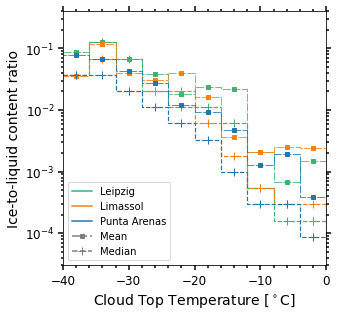

In [16]:
def make_stat_ILCR(data, avg='dB', values='Z_values', silent=False, season='all'):
    
    data_filtered = []
    for i, cloud in enumerate(data[:]):
        dt_begin = ts_to_dt(float(cloud['Begin_Date_Unix']))
        dt_end = ts_to_dt(float(cloud['End_Date_Unix']))
        duration = dt_end-dt_begin
        h_base = float(cloud['CBH'])
        n_prof = float(cloud['N_Profiles'])
        iwc_n = float(cloud['IWC_TOP_N'])

        if withCTH:
            conds = s_c.conditions_ice_w_CTH(cloud)
        else:
            conds = s_c.conditions_ice_wo_CTH(cloud)
            
        if season == 'warm':
            conds += [dt_begin.month in [10,11,12,1,2,3], f"{dt_begin.month}, warm"]
        elif season == 'cold':
            conds += [dt_begin.month in [4,5,6,7,8,9], f"{dt_begin.month}, cold"]

        if all(conds[::2]):
            data_filtered.append(cloud)
            
    reconstructed_z = np.array([])
    reconstructed_ctt = np.array([])
    print(len(data_filtered))
    for c in data_filtered[:]:
        #print(c['CTT'])
        z_values = ast.literal_eval(c[values])
        #print(z_values)
        _, edges = np.histogram([0],bins=np.logspace(-5, 0, num=20))
        #print(edges)
        centers = edges[:-1]+(edges[1:]-edges[:-1])/2.

        for v in zip(z_values, centers):
            #print(v)
            reconstructed_z = np.append(reconstructed_z, np.full(v[0], v[1]))
        reconstructed_ctt = np.append(reconstructed_ctt, np.full(sum(z_values), float(c['CTT'])))

        #print(reconstructed_z.shape, reconstructed_z)    
        #print(reconstructed_ctt.shape, reconstructed_ctt)

    # calibration adjustment
    reconstructed_ctt -= 273.15
    
    x = reconstructed_ctt
    y = reconstructed_z
    if avg == 'lin':
        y = 10**(y/10.)
        
    counts, _, _ = scipy.stats.binned_statistic(
        x, y, statistic='count', bins=set_x_edges)
    std, _, _ = scipy.stats.binned_statistic(
        x, y, statistic='std', bins=set_x_edges)
    mean_along_x, xedge, _ = scipy.stats.binned_statistic(
        x, y, statistic='mean', bins=set_x_edges)
    median_along_x, _, no_per_bin = scipy.stats.binned_statistic(
        x, y, statistic='median', bins=set_x_edges)
    P2_5, _, no_per_bin = scipy.stats.binned_statistic(
        x, y, statistic=lambda y: np.percentile(y, 2.5), bins=set_x_edges)
    Q1, _, no_per_bin = scipy.stats.binned_statistic(
        x, y, statistic=lambda y: np.percentile(y, 25), bins=set_x_edges)
    Q3, _, no_per_bin = scipy.stats.binned_statistic(
        x, y, statistic=lambda y: np.percentile(y, 75), bins=set_x_edges)
    P97_5, _, no_per_bin = scipy.stats.binned_statistic(
        x, y, statistic=lambda y: np.percentile(y, 97.5), bins=set_x_edges)
    
    xcenters = xedge[:-1]+(xedge[1:]-xedge[:-1])/2.
    
    if avg == 'lin':
        mean_along_x = 10*np.log10(mean_along_x)
        median_along_x = 10*np.log10(median_along_x)
        std = 10*np.log10(std)
        P2_5 = 10*np.log10(P2_5)
        Q1 = 10*np.log10(Q1)
        Q3 = 10*np.log10(Q3)
        P97_5 = 10*np.log10(P97_5)
    
    return {
        'xcenters': xcenters,
        'counts': counts,
        'std': std,
        'mean_along_x': mean_along_x,
        'median_along_x': median_along_x,
        'P2_5': P2_5,
        'Q1': Q1,
        'Q3': Q3,
        'P97_5': P97_5,
    }


avg = 'lin'
# avg = 'dB'
values='ILCR_values'
# values='Z_values'
print(' === Clouds Limassol =============                ')
stat_limassol = make_stat_ILCR(load_data(filename['Lim_larda3']), avg, values=values, silent=True)
print(' === Clouds Punta    =============                ')
stat_punta = make_stat_ILCR(load_data(filename['Pun_larda3']), avg, values=values, silent=True, season=season)
print(' === Clouds Leipzig  =============                ')
stat_le = make_stat_ILCR(load_data(filename['Lei_larda3']), avg, values=values, silent=True)

print('T  lim/punt, le/punt')
for e in zip(
    stat_le['xcenters'],
    stat_limassol['mean_along_x']/stat_punta['mean_along_x'],
    stat_limassol['median_along_x']/stat_punta['median_along_x'],
    stat_le['mean_along_x']/stat_punta['mean_along_x'],
    stat_le['median_along_x']/stat_punta['median_along_x'],
    ):
    
    print(f"{e[0]:>5.1f}   {e[1]:6.2f}   {e[2]:6.2f}")



fig, ax = plt.subplots(figsize=(4.8, 4.5))

print(stat_le['xcenters'])
ax.step(stat_le['xcenters'], stat_le['mean_along_x'],
        lw=0.8, ls=(0, (10, 2)), marker='s', markersize=3.3,
        where='mid', color='mediumseagreen')
ax.step(stat_le['xcenters'], stat_le['median_along_x'],
        marker='+', ms=8,
        lw=1.2, where='mid', linestyle='--', color='mediumseagreen')
print(stat_le['std'])
sampling_error = stat_le['std']/np.sqrt(stat_le['counts'])
print('Lei sampling error', sampling_error)


# ax.errorbar(stat_le['xcenters']-0.5, stat_le['mean_along_x'], yerr=stat_le['std'], 
#             color='mediumseagreen', capsize=4, 
#             linewidth=0, elinewidth=1.5)

ax.step(stat_limassol['xcenters'], stat_limassol['mean_along_x'],
        lw=0.8, ls=(3, (10, 2)), marker='s', markersize=3.3,
        where='mid', color='C1')
ax.step(stat_limassol['xcenters'], stat_limassol['median_along_x'],
        marker='+', ms=8,
        lw=1.2, where='mid', linestyle='--', color='C1')
sampling_error = stat_limassol['std']/np.sqrt(stat_limassol['counts'])
print('Lim sampling error', sampling_error)

ax.step(stat_punta['xcenters'], stat_punta['mean_along_x'],
        lw=0.8, ls=(6, (10, 2)), marker='s', markersize=3.3,
        where='mid', color='C0')
ax.step(stat_punta['xcenters'], stat_punta['median_along_x'],
        marker='+', ms=8,
        lw=1.2, where='mid', linestyle='--', color='C0')
sampling_error = stat_punta['std']/np.sqrt(stat_punta['counts'])
print('Pun sampling error', sampling_error)


# ax.set_ylim([-45,-5])
# ax.set_xlim([-40, 0])
ax.set_ylim([3e-5, 4e-1])
ax.set_yscale('log')
ax.set_xlim([-40, 0])

handles, labels = ax.get_legend_handles_labels()
patch = matplotlib.lines.Line2D([0], [0], color='mediumseagreen', label='Leipzig')
handles.append(patch) 
patch = matplotlib.lines.Line2D([0], [0], color='C1', label='Limassol')
handles.append(patch) 
patch = matplotlib.lines.Line2D([0], [0], color='C0', label='Punta Arenas')
handles.append(patch) 
patch = matplotlib.lines.Line2D([0], [0], color='grey', marker='s', ms=3.3, ls=(0, (10, 2)), label='Mean')
handles.append(patch) 
patch = matplotlib.lines.Line2D([0], [0], color='grey', marker='+', ms=8, ls='--', label='Median')
handles.append(patch) 

ax.legend(handles=handles)
ax.set_xlabel("Cloud Top Temperature [$^\circ$C]", fontsize=14)
ax.set_ylabel("Ice-to-liquid content ratio", fontsize=14)

ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
#ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.tick_params(axis='both', which='major', direction='out',
               top=True, right=True,
               width=1.5, length=5, labelsize=12)
ax.tick_params(axis='both', which='minor', direction='out', 
               top=True, right=True,
               width=1.5, length=2.5)

fig.tight_layout()
if season != 'all':
    fname = '../plots/ice_hists/Lim_Punta_ILCR_{}_{}_{}'.format(avg, values, season)
else:
    fname = '../plots/ice_hists/Lim_Punta_ILCR_{}_{}'.format(avg, values)
plt.savefig(fname+".png", dpi=250)
# plt.savefig(fname+".svg", dpi=250)

